
**Clustering with Customer Dataset**

This notebook provides a general framework for performing customer segmentation using unsupervised learning. It includes advanced techniques for data exploration and achieving robust results.

**We will use the [marketing_campain](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input) data set from kaggle. Here is a decription of the dataset :**

| Column Name          | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `ID`                 | Unique identifier for each customer.                                       |
| `Year_Birth`         | Year of birth of the customer.                                             |
| `Education`          | Level of education attained by the customer (e.g., Graduate, PhD).         |
| `Marital_Status`     | Marital status of the customer (e.g., Single, Married, Divorced).          |
| `Income`             | Annual income of the customer.                                             |
| `Kidhome`            | Number of children in the customer's household.                            |
| `Teenhome`           | Number of teenagers in the customer's household.                           |
| `Dt_Customer`        | Date when the customer was enrolled with the company.                      |
| `Recency`            | Number of days since the customer's last purchase.                         |
| `MntWines`           | Amount spent on wine in the last 2 years.                                  |
| `MntFruits`          | Amount spent on fruits in the last 2 years.                                |
| `MntMeatProducts`    | Amount spent on meat products in the last 2 years.                         |
| `MntFishProducts`    | Amount spent on fish products in the last 2 years.                         |
| `MntSweetProducts`   | Amount spent on sweets in the last 2 years.                                |
| `MntGoldProds`       | Amount spent on gold products in the last 2 years.                         |
| `NumDealsPurchases`  | Number of purchases made with discounts.                                   |
| `NumWebPurchases`    | Number of purchases made through the company’s website.                    |
| `NumCatalogPurchases`| Number of purchases made using catalogs.                                   |
| `NumStorePurchases`  | Number of purchases made directly in stores.                               |
| `NumWebVisitsMonth`  | Number of visits to the company’s website in the last month.               |
| `AcceptedCmp1`       | Response to campaign 1 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp2`       | Response to campaign 2 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp3`       | Response to campaign 3 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp4`       | Response to campaign 4 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp5`       | Response to campaign 5 (1 = Accepted, 0 = Not Accepted).                   |
| `Complain`           | Whether the customer has complained in the last 2 years (1 = Yes, 0 = No). |
| `Response`           | Overall response to the last campaign (1 = Accepted, 0 = Not Accepted).    |

### initialisation 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

np.random.seed(42)

In [2]:
path = "marketing_campaign.csv"
data = pd.read_csv(path, delimiter="\t")

# CLEANING

- Drop any irrelevant columns if necessary andhHandle missing data.
- Use visualizations (e.g., histograms or pair plots) to understand the distribution of the data.


#### Load data

In [3]:
print("dzataset shape :", data.shape)

dzataset shape : (2240, 29)


In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Missing data

In [7]:
data.isna().sum().sort_values(ascending=False)[:3]


Income               24
ID                    0
NumDealsPurchases     0
dtype: int64

In [8]:
data.Income = data.Income.fillna(data.Income.mean())

In [9]:
data.isna().sum().sort_values(ascending=False)[:3]

ID                   0
NumDealsPurchases    0
Z_Revenue            0
dtype: int64

## Feature engineering

In [10]:
data.Year_Birth

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [11]:
data.Dt_Customer = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
data["Customer_For"] = data.Dt_Customer.apply(lambda x : max(data.Dt_Customer) - x )
data["Customer_For"] = pd.to_numeric(data["Customer_For"])

In [12]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [13]:
data.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
# Convert birthday in age
data["Age"] = 2024 - data.Year_Birth

education_map = {"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}
data.Education.replace(education_map, inplace=True)

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Living_With"] = np.where(data["Marital_Status"].isin(["Married", "Together"]), 1, 0)

data["Total_Children"] = data.Teenhome + data.Kidhome

data["family_size"] = data.Total_Children + data.Living_With + 1

data["Is_Parent"] = np.where(data.Total_Children> 0, 1, 0)

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

data.drop(columns=["Marital_Status", "Z_CostContact", "Z_Revenue", "Dt_Customer", "Year_Birth", "ID"], inplace=True)


### Visualisation of the data set

Reletive Plot Of Some Selected Features: A Data Subset


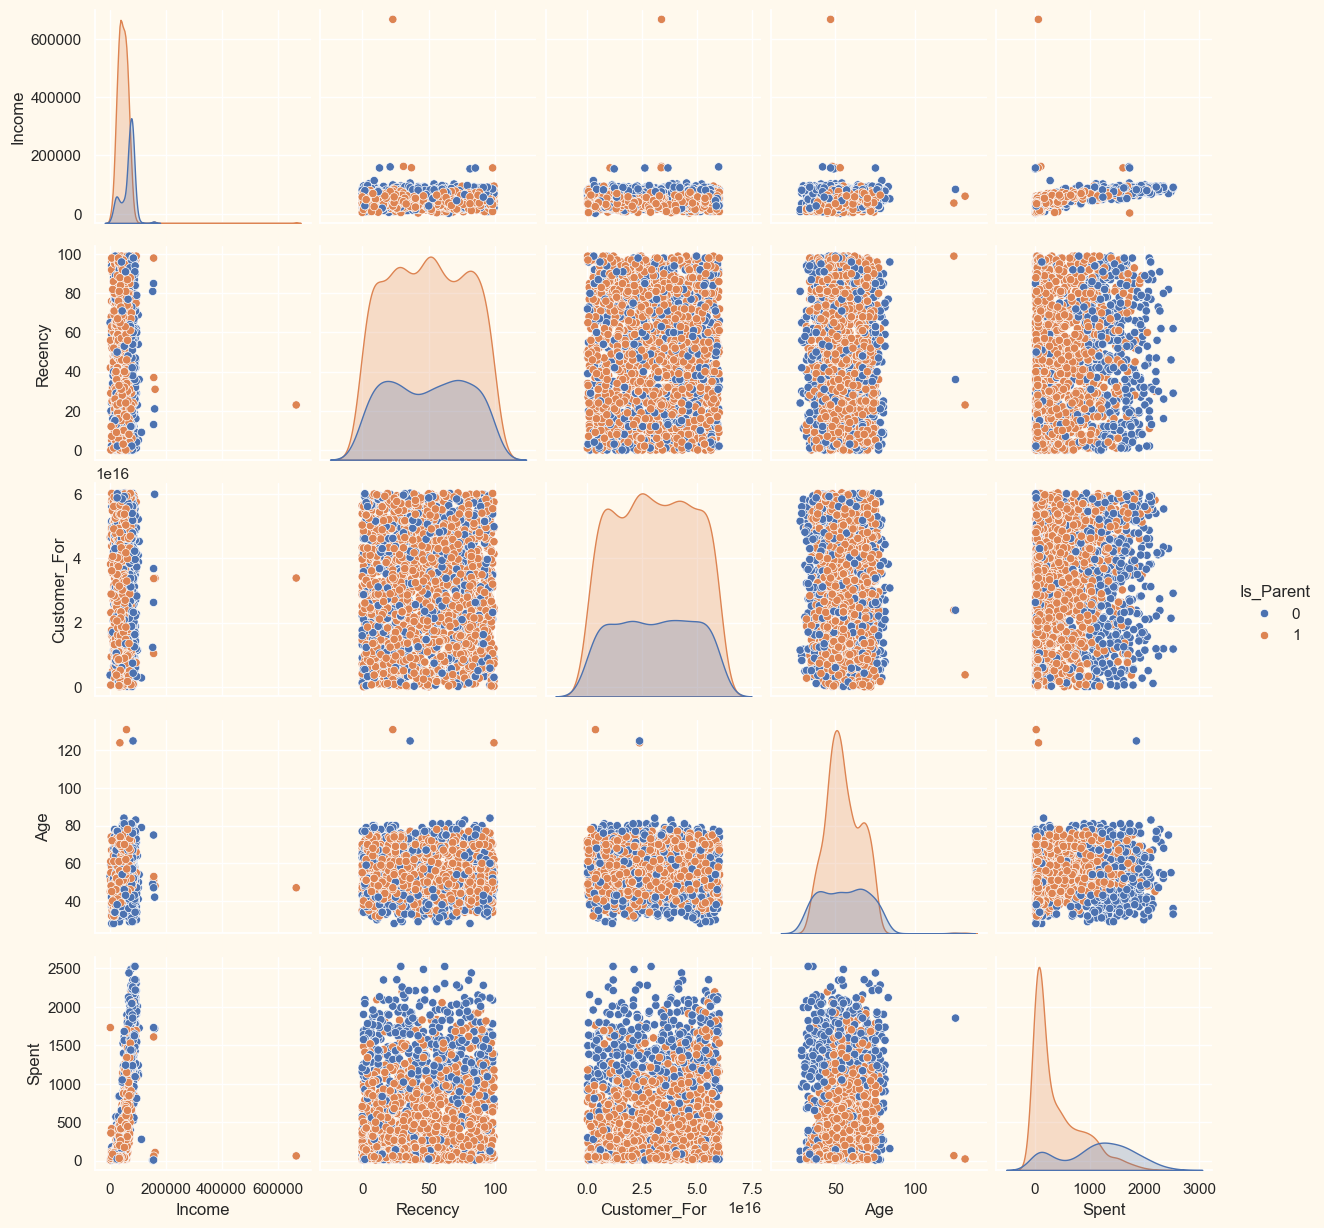

In [15]:
to_plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

print("Reletive Plot Of Some Selected Features: A Data Subset")

sns.pairplot(data[to_plot], hue= "Is_Parent")

There are few outliers

In [16]:
data = data[data.Income < 300000]
data = data[data.Age < 90]

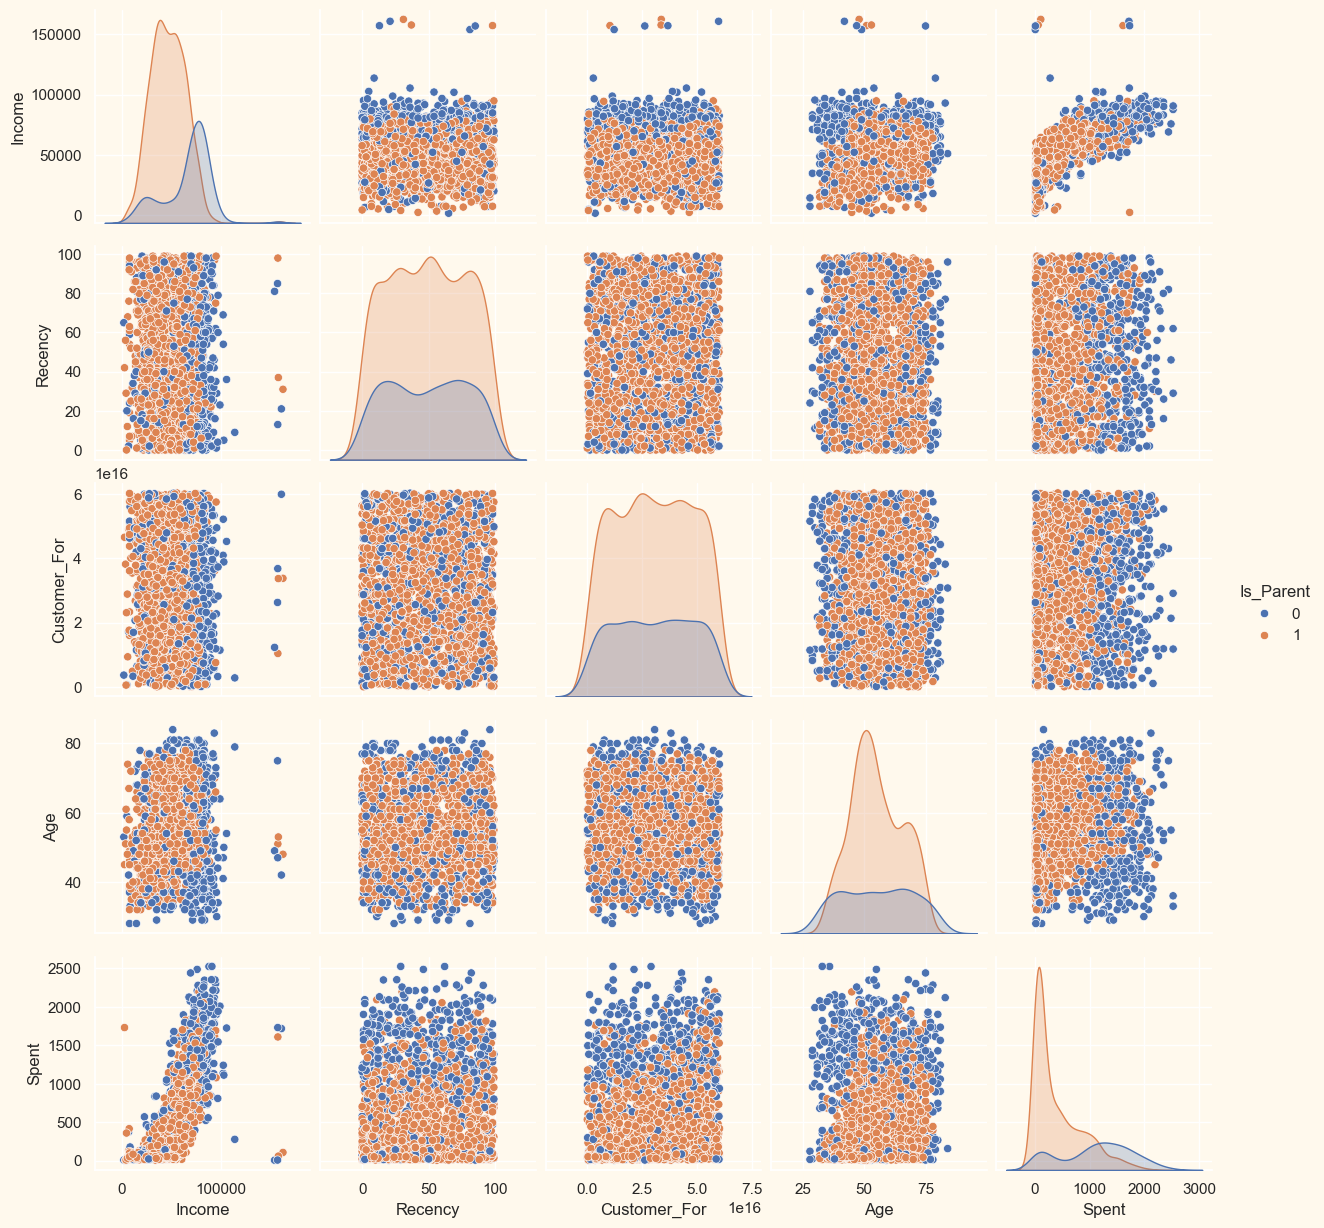

In [17]:
sns.pairplot(data[to_plot], hue= "Is_Parent")

<Axes: >

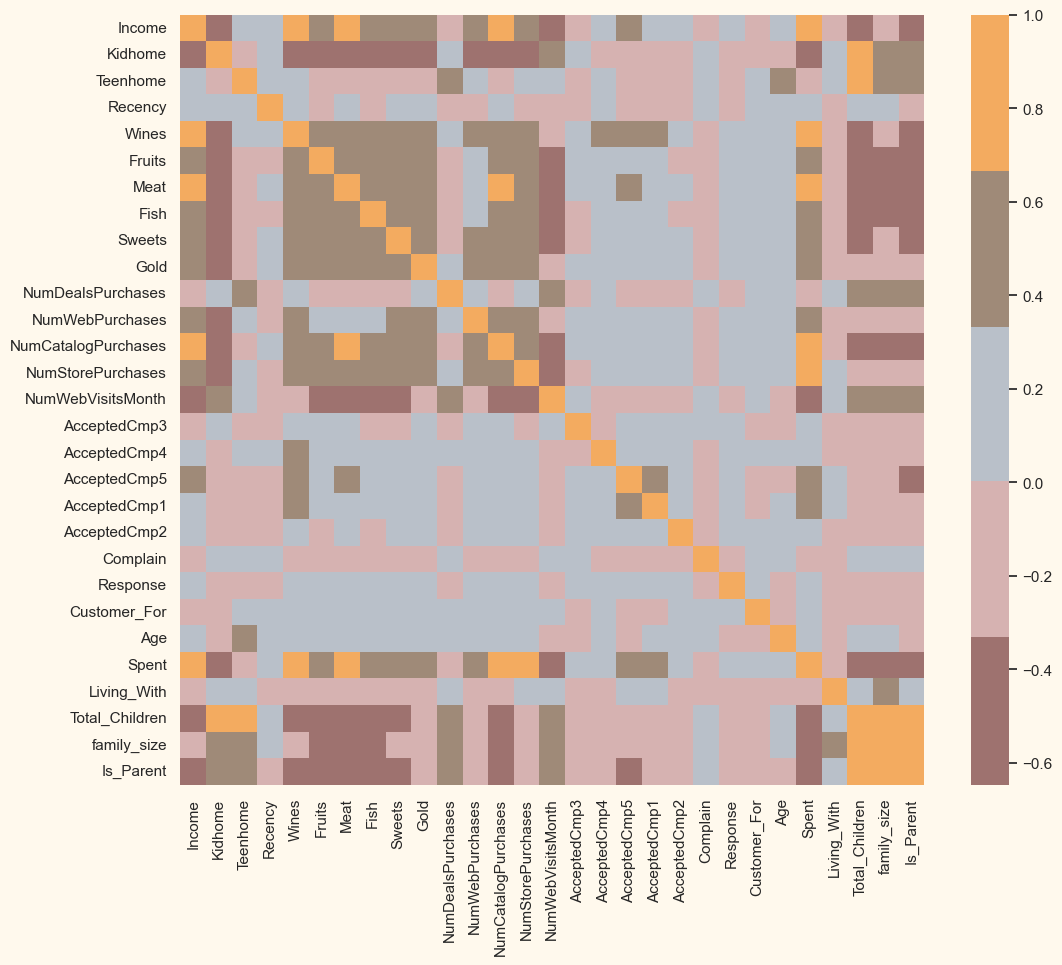

In [18]:
to_plot = data.select_dtypes(include='number')
from matplotlib import colors

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#correlation matrix
corrmat = to_plot.corr()
plt.figure(figsize=(12,10))  
sns.heatmap(corrmat,annot=False, center=0, cmap=cmap)

# DATA PROCESSING

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction


In [19]:
columns_object = data.loc[:, data.dtypes == "object"].columns
columns_object

Index(['Education'], dtype='object')

In [20]:
encoders = {}

for col in columns_object:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
print("All features are now numerical")


All features are now numerical


In [21]:
# cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

# tmp = data.drop(columns=cols_del)
# scaler = StandardScaler()
# scaler.fit(tmp)
# scaled_ds = pd.DataFrame(scaler.transform(tmp),columns= tmp.columns )
# print("All features are now scaled")

In [22]:
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


# DIMENSIONALITY REDUCTION

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

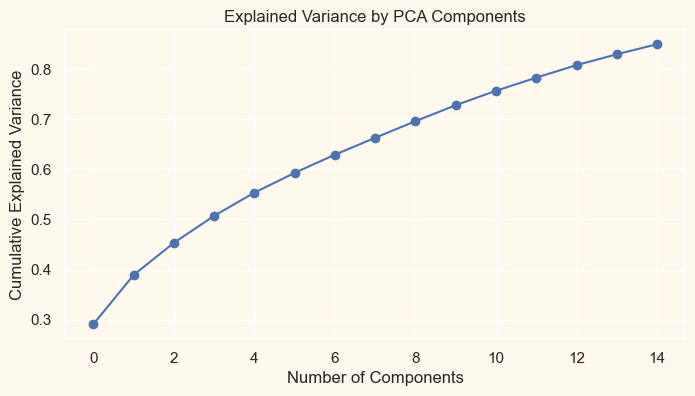

In [23]:
# Principal Composent Analysis
n_dims = 15

pca = PCA(n_components=n_dims)

pca.fit_transform(scaled_ds)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,4))
plt.plot(cumulative_variance, marker = "o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()


In [24]:
pca = PCA(n_components=3)

PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds), columns = ["Feature_1","Feature_2","Feature_3"])
display(PCA_df.describe().T)

count          mean       std       min       25%       50%  \
Feature_1  2236.0  9.533221e-17  2.955613 -5.917050 -2.547175 -0.857503   
Feature_2  2236.0  9.533221e-17  1.716469 -4.161937 -1.352332 -0.161752   
Feature_3  2236.0 -1.747757e-17  1.386406 -3.170727 -0.777697 -0.159181   

                75%       max  
Feature_1  2.252441  8.544337  
Feature_2  1.239769  6.035705  
Feature_3  0.409675  8.274373

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.29105806, 0.38922302, 0.45326504])

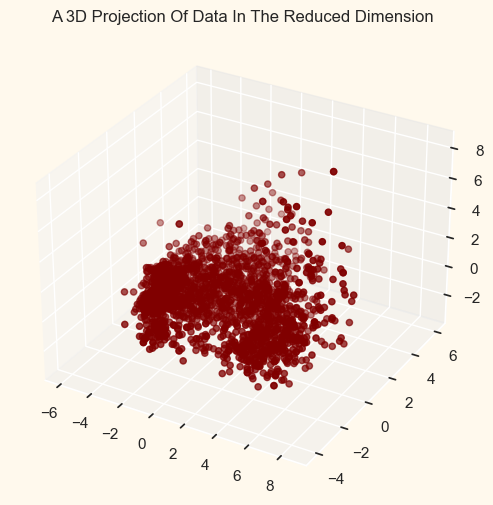

In [26]:
x = PCA_df["Feature_1"]
y = PCA_df["Feature_2"]
z = PCA_df["Feature_3"]

fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

| **Criterion**                   | **Recommended Algorithm**            |
|---------------------------------|---------------------------------------|
| Well-separated, fast data       | K-Means                               |
| Noisy or dense data             | DBSCAN, OPTICS                        |
| Non-spherical clusters          | Spectral Clustering, DBSCAN           |
| Small hierarchical datasets     | Hierarchical Clustering               |
| High complexity (varied shapes) | GMM, Mean Shift                       |
| Large datasets                  | BIRCH                                 |
| Complex learning tasks          | Deep Learning (Autoencoders, DEC)     |


In [27]:
features = PCA_df.columns

def plotCluster3D(cluster_col, cluster_name):
    c = PCA_df[cluster_col]
    x = PCA_df["Feature_1"]
    y = PCA_df["Feature_2"]
    z = PCA_df["Feature_3"]

    fig = plt.figure(figsize=(6,7))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x,y,z, c=c, cmap='viridis', marker="o", s=10, alpha=0.5)
    ax.set_title(f"3D Clustering with {cluster_name}")
    plt.show()

## KMeans++

### Elbow Method

Two methods to determine the number of cluster k : **Distortion Score**  and **Inertia**

| Caractéristique      | **Distortion Score**                    | **Inertia**                           |
|----------------------------|------------------------------------------|----------------------------------------|
| *Interprétation*         | Distance moyenne au carré               | Somme totale des distances au carré    |
| *Normalisation*          | Oui (divisée par $N $)               | Non (valeur brute)                     |
| *Sensibilité à la taille*| Indépendante de $N $                 | Dépendante de $N $                 |


#### First method (using for loop with kmeans)

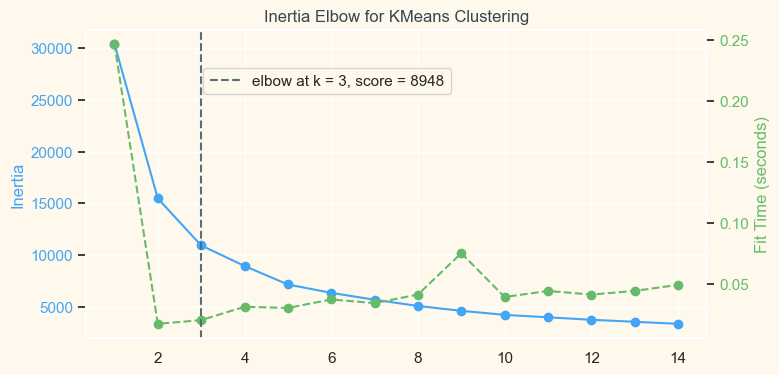

In [28]:
import time
inertias = []
times = []
for k in range (1,15):
    knn = KMeans(n_clusters=k, n_init=10, init='k-means++')

    start = time.time()
    knn.fit(PCA_df[features])
    end = time.time()

    inertias.append(knn.inertia_)
    times.append(end-start)

# plot results
plt.figure(figsize=(8,4))

plt.plot(range(1,15),inertias, 'o-', color="#42a5f5")
plt.ylabel('Inertia', color='#42a5f5')
plt.tick_params(axis='y', labelcolor='#42a5f5')


plt.twinx()
plt.plot(range(1,15),times, 'o--', color="#66bb6a")
plt.ylabel('Fit Time (seconds)', color='#66bb6a')
plt.tick_params(axis='y', labelcolor='#66bb6a')
plt.grid(False)

plt.xlabel("k_cluster")

elbow_k = 3
elbow_score = inertias[elbow_k]
plt.axvline(x=elbow_k, color='#546e7a', linestyle='--', label=f'elbow at k = {elbow_k}, score = {int(elbow_score)}')  

plt.title('Inertia Elbow for KMeans Clustering', color='#37474f')  # Gris plus marqué
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 0.9))

plt.show()

#### Second method (using KElbowVisualizer from yellowbrick.cluster)

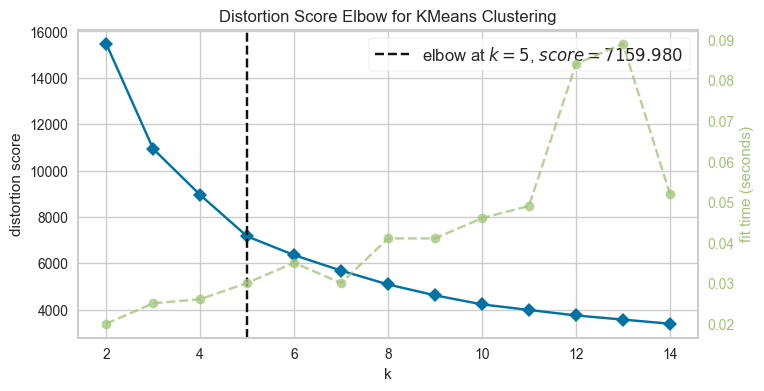

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(8,4))
Elbow_M = KElbowVisualizer(KMeans(n_init=10, init="k-means++"), k=14)
Elbow_M.fit(PCA_df[features])
Elbow_M.show()


For the folowing we will take the value of k from the **Inertia methode**, thus : **$k=3$**

In [30]:
K = 3

### KMeans++

In [31]:
kmeans_pp = KMeans(n_clusters=K, init="k-means++", n_init=10)
kmeans_pp.fit(PCA_df)
labels = kmeans_pp.predict(PCA_df)

PCA_df["Cluster_Kmeans"] = labels
data["Cluster_Kmeans"] = labels

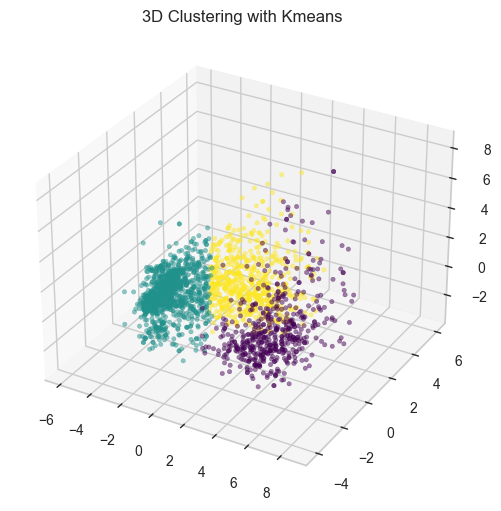

In [32]:
c = PCA_df["Cluster_Kmeans"]
x = PCA_df["Feature_1"]
y = PCA_df["Feature_2"]
z = PCA_df["Feature_3"]

fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=c, cmap='viridis', marker="o", s=10, alpha=0.5)
ax.set_title("3D Clustering with Kmeans")
plt.show()

## Hierarchical Clustering (Agglomerative)

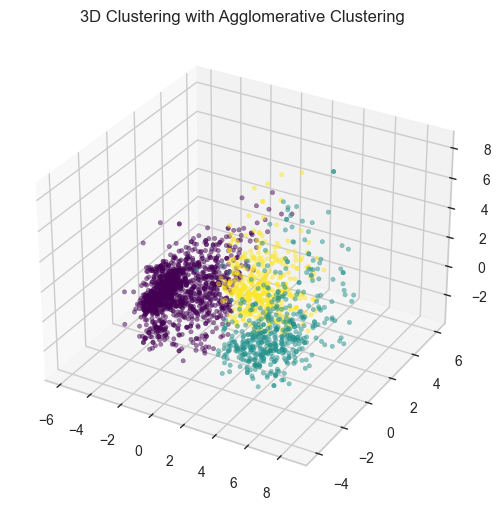

In [33]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
clusters_ac = ac.fit_predict(PCA_df[features])

data["Cluster_Ac"] = clusters_ac
PCA_df["Cluster_Ac"] = clusters_ac

plotCluster3D("Cluster_Ac", "Agglomerative Clustering")

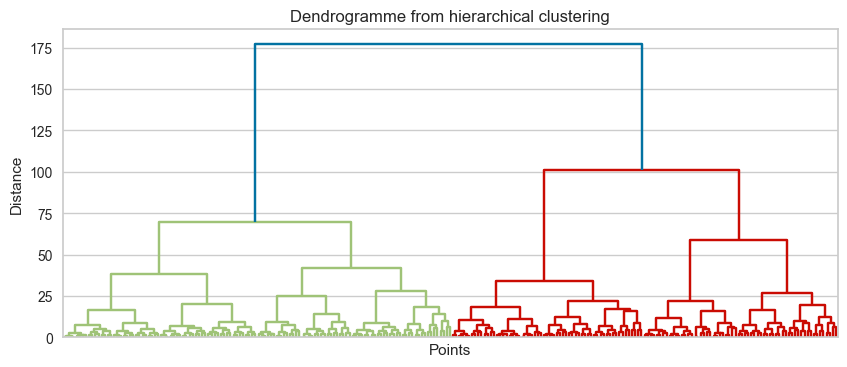

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(PCA_df, method='ward')

plt.figure(figsize=(10, 4))
dendrogram(linked, truncate_mode = "level", p = 7, no_labels=True)
plt.title("Dendrogramme from hierarchical clustering")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

## Gaussian Mixture Models (GMM)

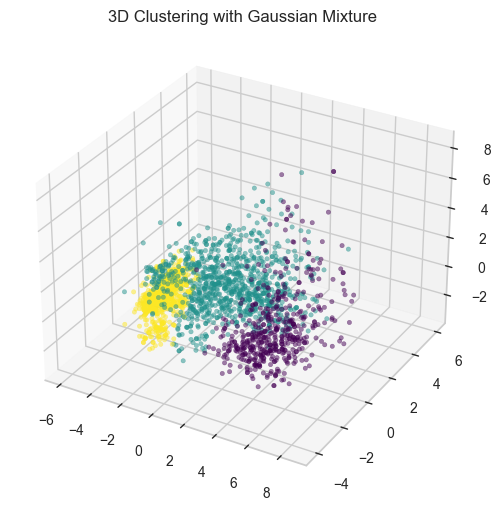

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=K, covariance_type= 'full')
gmm.fit(PCA_df[features])

data["Cluster_Gmm"] = gmm.predict(PCA_df[features])
PCA_df["Cluster_Gmm"] = gmm.predict(PCA_df[features])

plotCluster3D("Cluster_Gmm", "Gaussian Mixture")

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

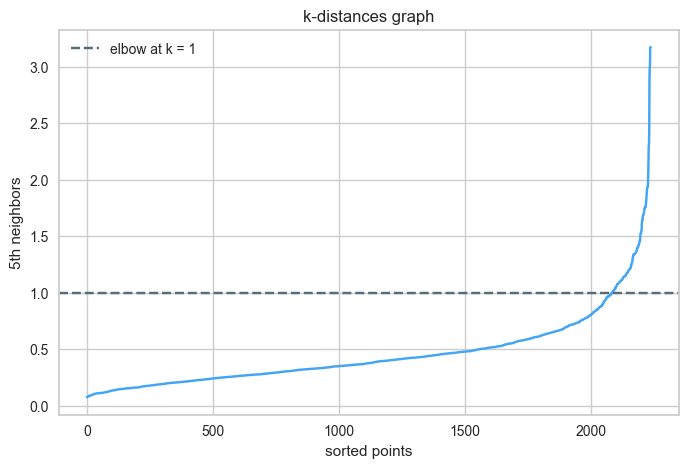

In [36]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)  
neigh.fit(PCA_df)
distances, _ = neigh.kneighbors(PCA_df)

distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,5))
plt.plot(distances, c = "#42a5f5")
plt.axhline(y=1, color='#546e7a', linestyle='--', label=f'elbow at k = {1}')  
plt.xlabel("sorted points")
plt.ylabel("5th neighbors")
plt.legend()
plt.title("k-distances graph")
plt.show()

We take $ε = 1$ and min_sample $ = 15$

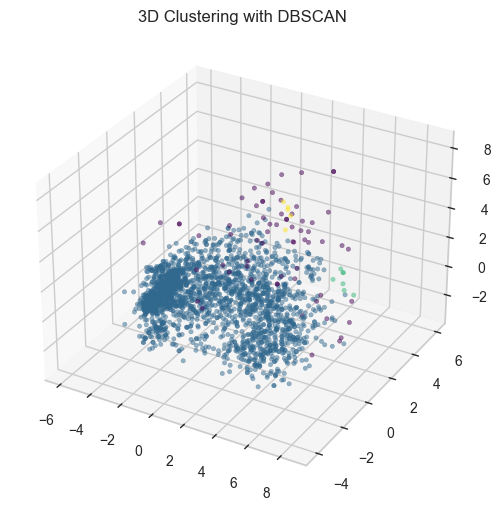

In [41]:
from sklearn.cluster import DBSCAN

epsi = 1
min_sample = 5

dbscan = DBSCAN(eps = epsi, min_samples=min_sample)
clusters_Dbscan = dbscan.fit_predict(PCA_df[features])
PCA_df["Cluster_Dbscan"] = clusters_Dbscan
data["Cluster_Dbscan"] = clusters_Dbscan

plotCluster3D("Cluster_Dbscan", "DBSCAN")

# EVALUATING MODELS

***Performance Metrics*** 
- **Silhouette score** : 

| Silhouette Score Value   | Interpretation                                                                 |
|--------------------------|-------------------------------------------------------------------------------|
| **> 0.7**                   | Very strong clustering: clusters are well-formed and clearly separated.      |
| **0.5 - 0.7**                | Acceptable clustering: clusters are well-defined but may have some overlaps. |
| **0.25 - 0.5**               | Moderate clustering: clusters are present but may not be clearly distinct.   |
| **< 0.25**                   | Weak clustering: poor cluster separation; the model may not be appropriate.  |

- **Davies-Bouldin Index (DB)** : 
<br>Measures the **quality** of clusters by assessing their **compactness** (how close points are within a cluster) and **separation** (how far clusters are from each other).
<br> Good for **comparing** different clustering **models** or the optimal **number of clusters**.

| **DB Score**       | **Interpretation**                                                               |
|---------------------|----------------------------------------------------------------------------------|
| **0 - 0.5**         | Excellent clustering: clusters are compact and well-separated.                  |
| **0.5 - 1.5**       | Good clustering: clusters are generally well-formed but may have slight overlap.|
| **1.5 - 2.5**       | Average clustering: noticeable overlap or less compact clusters.                |
| **> 2.5**           | Poor clustering: clusters are either poorly separated, overlapping, or ill-defined.|

## KMeans++

### Silhouette

In [42]:
from matplotlib import colormaps

models = [mod for mod in PCA_df.columns if mod.startswith("Cluster")]
perf_scores = pd.DataFrame(models, columns=["Clustering_Model"])


def plotScore(score_name, ascending = False):
    from matplotlib import colormaps

    cmap = colormaps["cividis"] 
    colors = [cmap(score) for score in np.linspace(0, 1, len(perf_scores))][::-1]

    perf_scores_sorted = perf_scores.sort_values(by=score_name, ascending=ascending)

    plt.figure(figsize=(8, 5))
    sns.barplot(
    data=perf_scores_sorted,
        x="Clustering_Model",
        y=score_name,
        hue="Clustering_Model",
        dodge=False,  
        palette=colors,
        alpha=0.8
    )
    plt.title(f"{score_name} by Clustering Model", fontsize=14)
    plt.show()

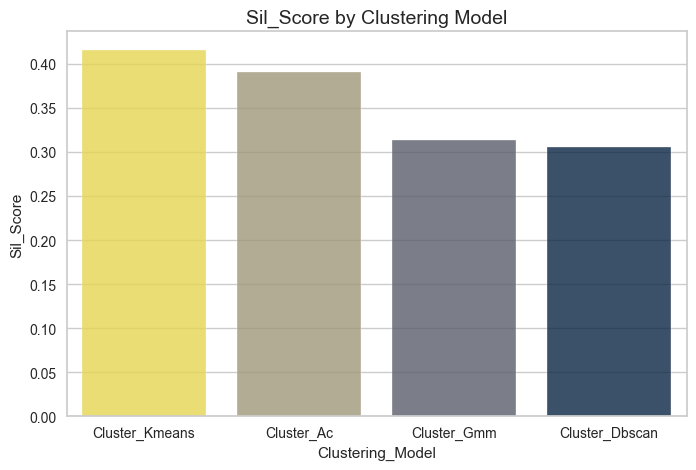

In [43]:
from sklearn.metrics import silhouette_score

sil_scores = []
PCA_df.columns
for mod in models:
    sil_value = silhouette_score(PCA_df[features], PCA_df[mod])
    sil_scores.append(round(sil_value,3))

perf_scores["Sil_Score"] = sil_scores

plotScore("Sil_Score")

### Davies-Bouldin Index (DB)

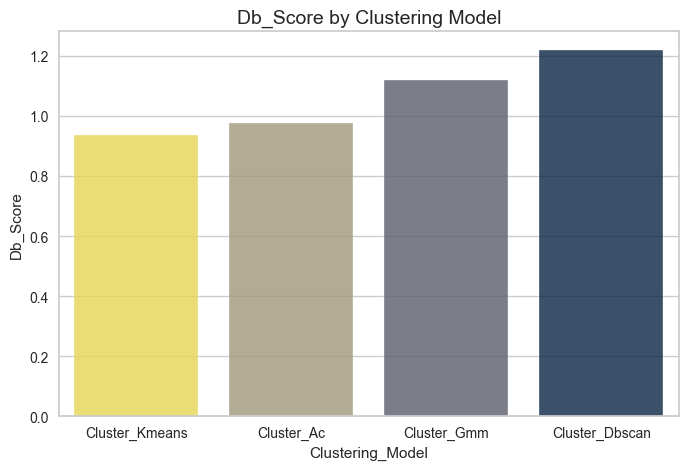

In [44]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
PCA_df.columns
for mod in models:
    db_value = davies_bouldin_score(PCA_df[features], PCA_df[mod])
    db_scores.append(round(db_value,3))

perf_scores["Db_Score"] = db_scores

plotScore("Db_Score", ascending=True)

KMeans++ is the most effective clustering method. For now, we will focus on profiling the clusters identified by this algorithm.

# PROFILING

### Distributuion of clusters

In [423]:
data.groupby(by=["Cluster_Kmeans"]).count().reset_index().Education

0     519
1    1090
2     627
Name: Education, dtype: int64

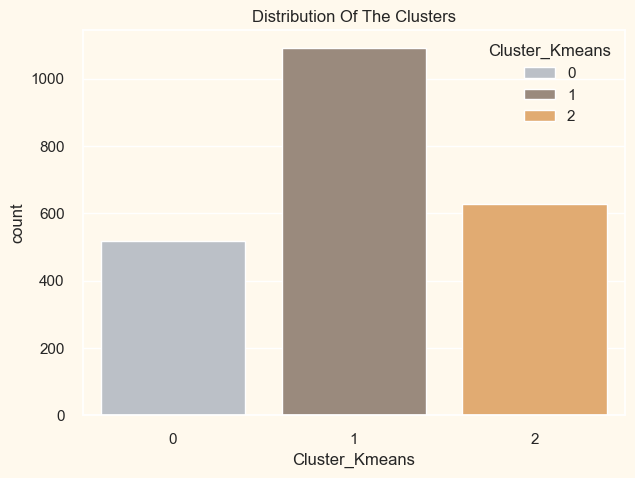

In [425]:
pal = ["#B9C0C9", "#9F8A78", "#F3AB60"]

plt.figure(figsize=(7,5))
pl = sns.countplot(x=data["Cluster_Kmeans"], hue=data["Cluster_Kmeans"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

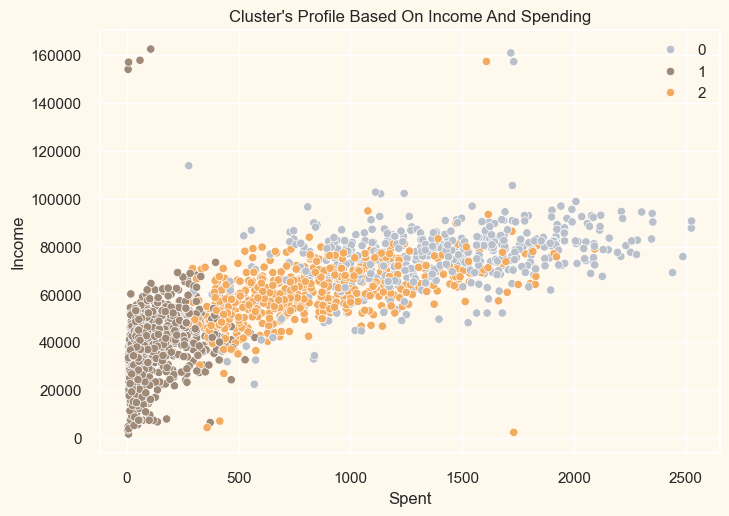

In [426]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Cluster_Kmeans"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

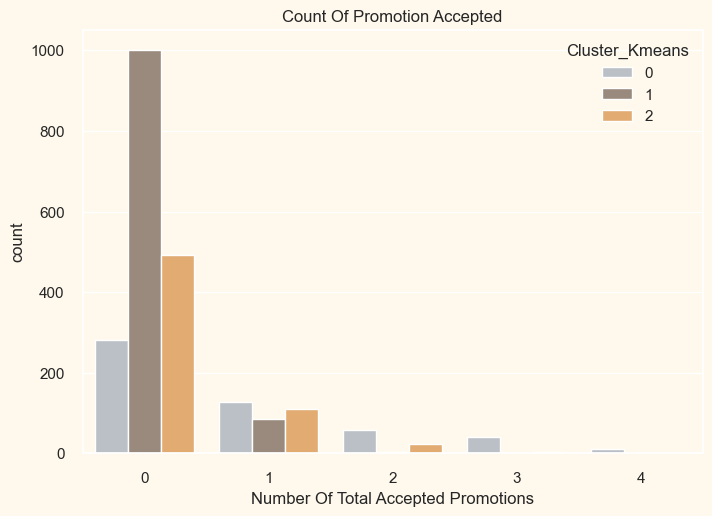

In [427]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Cluster_Kmeans"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<Figure size 800x550 with 0 Axes>

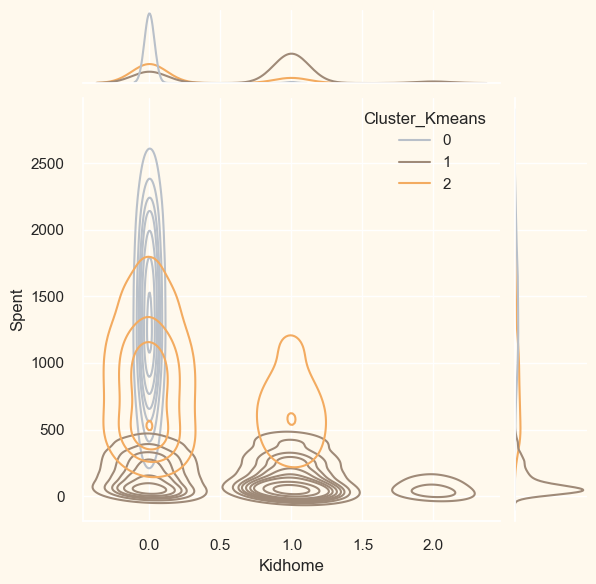

<Figure size 800x550 with 0 Axes>

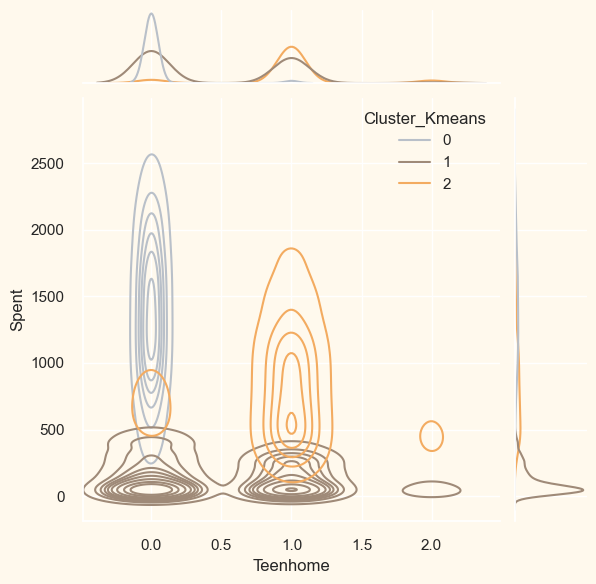

<Figure size 800x550 with 0 Axes>

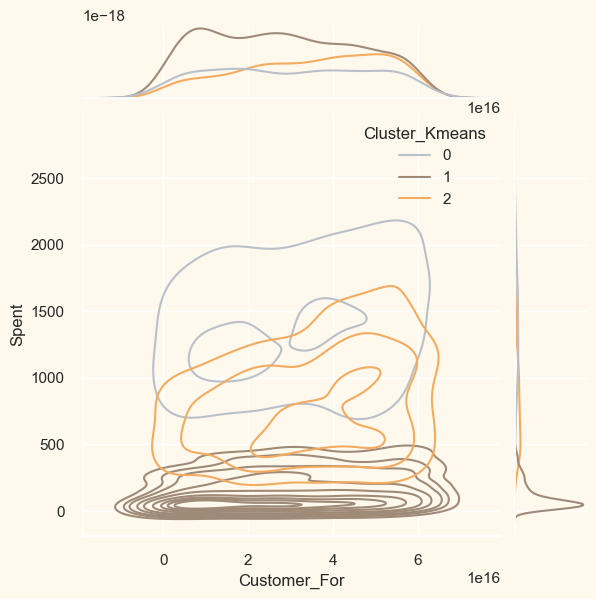

<Figure size 800x550 with 0 Axes>

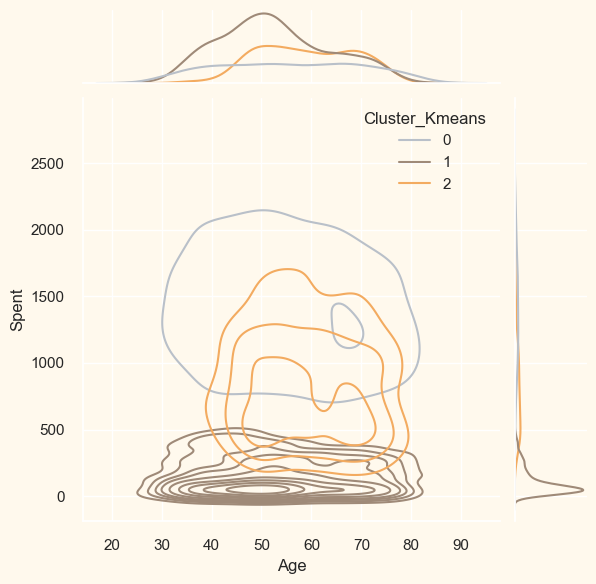

<Figure size 800x550 with 0 Axes>

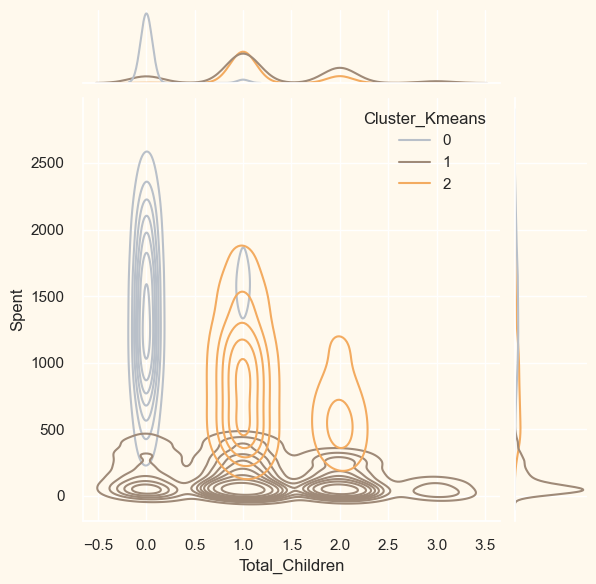

<Figure size 800x550 with 0 Axes>

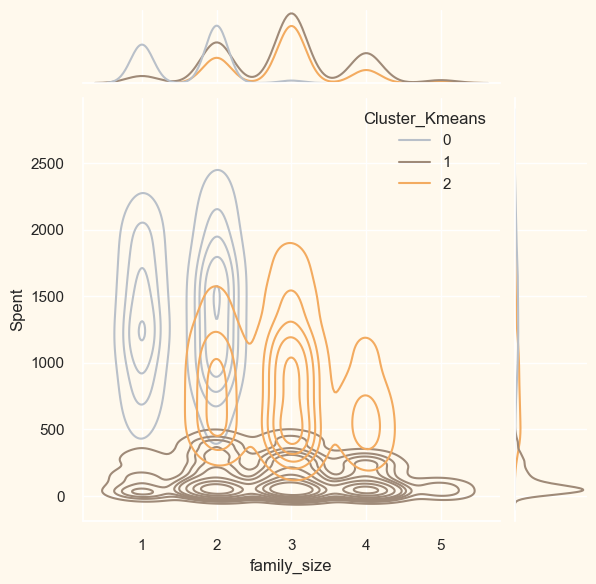

<Figure size 800x550 with 0 Axes>

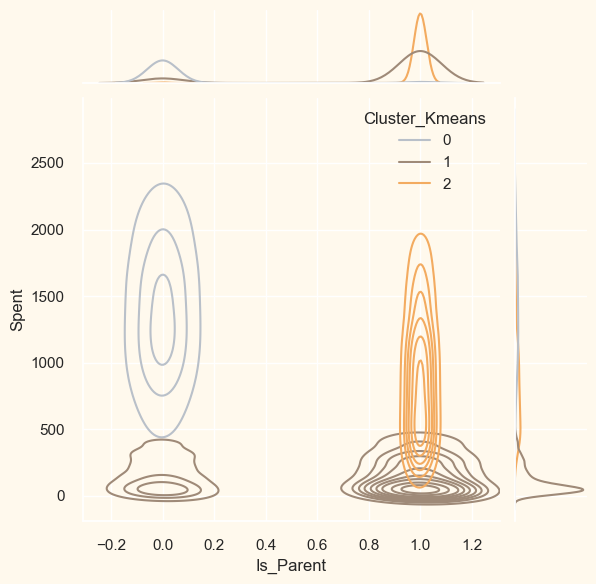

<Figure size 800x550 with 0 Axes>

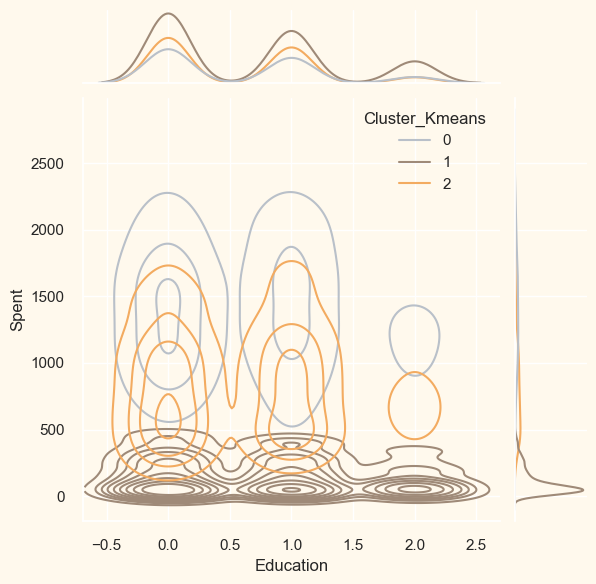

<Figure size 800x550 with 0 Axes>

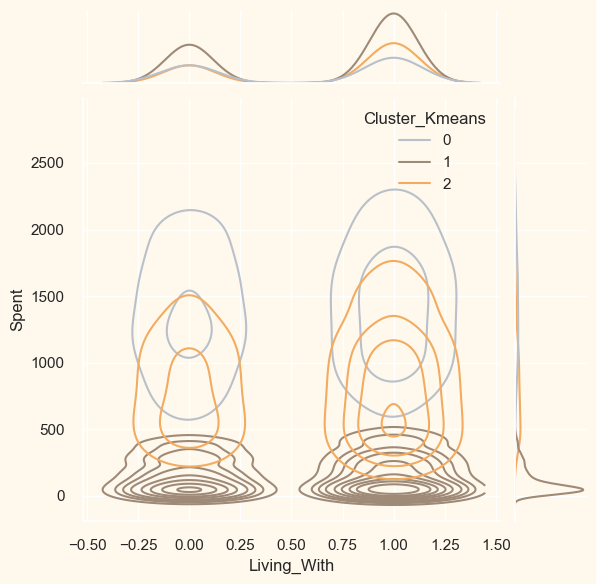

In [428]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Total_Children", "family_size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Cluster_Kmeans"], kind="kde", palette=pal)
    plt.show()